In [101]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.morphology import disk, square, erosion, dilation, area_closing

In [102]:
# first data, read CSV + image
path = '../Data/'
f_img = cv2.imread(path + 'ex01.jpg')
gray_f_img = cv2.cvtColor(f_img, cv2.COLOR_BGR2GRAY)
f_gt = pd.read_csv(path + 'ex01.csv', header=None)

In [103]:
f_gt

,0,1
0,485.0,870.0
1,495.0,1109.0
2,546.0,677.0
3,548.0,857.0
4,570.0,1015.0
5,578.0,710.0
6,690.0,1173.0
7,692.0,526.0
8,736.0,1433.0
9,808.0,1038.0


In [104]:
def plot_img(img, gt, title):
    xs = list(f_gt[0])
    ys = list(f_gt[1])
    plt.figure(figsize=(10,8))
    plt.title(title)
    plt.imshow(img, cmap='gray')
    for idx in range(len(xs)):
        j, i = ys[idx], xs[idx]
        plt.scatter(j, i, color='r')
    plt.show()

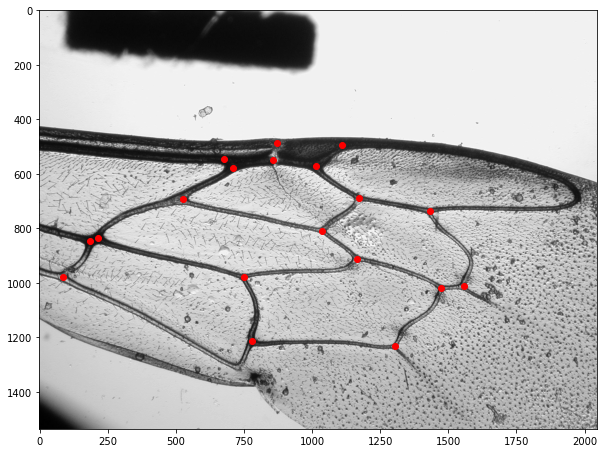

In [105]:
plot_img(gray_f_img, f_gt, title='')

In [106]:
# try Harris corner detector
gray_f_img = np.float32(gray_f_img)
gray_f_img.dtype, gray_f_img.shape

(dtype('float32'), (1536, 2048))

In [138]:
dst = cv2.cornerHarris(gray_f_img, blockSize=2, ksize=3, k=0.7)
dst

array([[-1.12879684e+02, -1.12879684e+02, -2.73757801e+01, ...,
        -2.17480451e-01, -5.17578097e-03,  0.00000000e+00],
       [-1.12879684e+02, -1.12879684e+02, -2.73757801e+01, ...,
        -2.17480451e-01, -5.17578097e-03,  0.00000000e+00],
       [-2.31207809e+02, -2.31207809e+02, -1.54988571e+02, ...,
        -2.47851551e-01, -1.75781245e-03,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -3.59914883e+04, -3.22508047e+04, -3.59540156e+04],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -5.71268398e+04, -1.46771807e+04, -3.10260625e+04],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -3.06891875e+04, -7.87063232e+02, -8.76800781e+02]], dtype=float32)

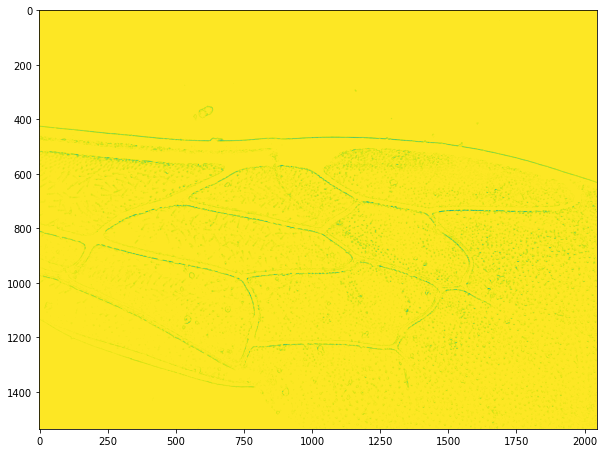

In [140]:
plt.figure(figsize=(10,8))
plt.imshow(dst)

In [135]:
dst

array([[-6.2655006e+01, -6.2655006e+01, -4.3034695e+01, ...,
        -3.4744877e-01, -1.9140627e-02, -3.0517578e-04],
       [-6.2655006e+01, -6.2655006e+01, -4.3034695e+01, ...,
        -3.4744877e-01, -1.9140627e-02, -3.0517578e-04],
       [-1.0052419e+02, -1.0052419e+02, -7.9292236e+01, ...,
        -1.8948975e-01, -2.3046877e-02, -1.4282227e-03],
       ...,
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -1.5716227e+04, -5.4337402e+03, -6.9500815e+03],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -1.9836531e+04, -5.5993486e+03, -5.6202939e+03],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -2.5645029e+04, -6.6025146e+03, -3.6859590e+03]], dtype=float32)

In [130]:
# dst = cv2.dilate(dst, None)
# plt.imshow(dst)

In [131]:
test_img = f_img.copy()
test_img[dst > 0.01 * dst.max()] = [255, 0, 0]

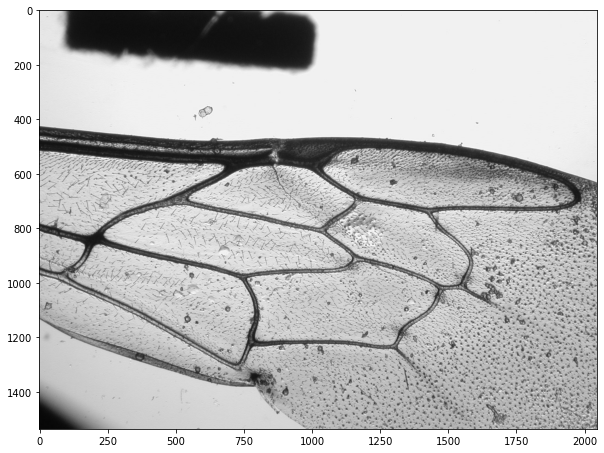

In [132]:
plt.figure(figsize=(10,8))
plt.imshow(test_img)

In [141]:
# TODO
# test matching and features matching